# Heart Attack Predicting Case Study

## Problem definition: Predict whether a patient will have a heart attack or not

### Features:
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


## Data preparation

In [2]:
data = pd.read_csv("heart.csv")
o2_saturation = pd.read_csv("o2Saturation.csv").head(303)

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

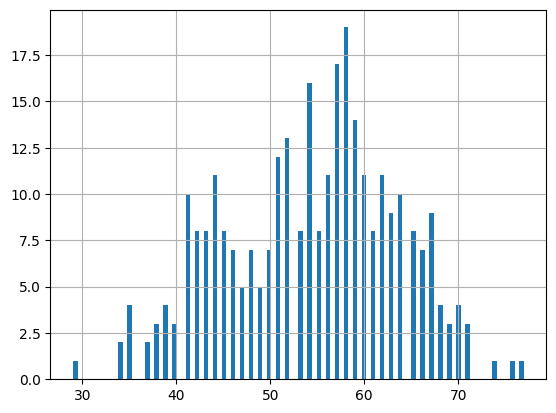

In [6]:
# what is the distribution of age column?

data.age.hist(bins=100)

In [8]:
# What is the share of wemales in the sample? What is the share of males?

data.sex.sum()/len(data)

0.6831683168316832

In [9]:
1-data.sex.sum()/len(data)

0.3168316831683168

In [12]:
# Add o2_saturation data in the data frame 'data'

data["o2_saturation"] = o2_saturation
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5


<Axes: >

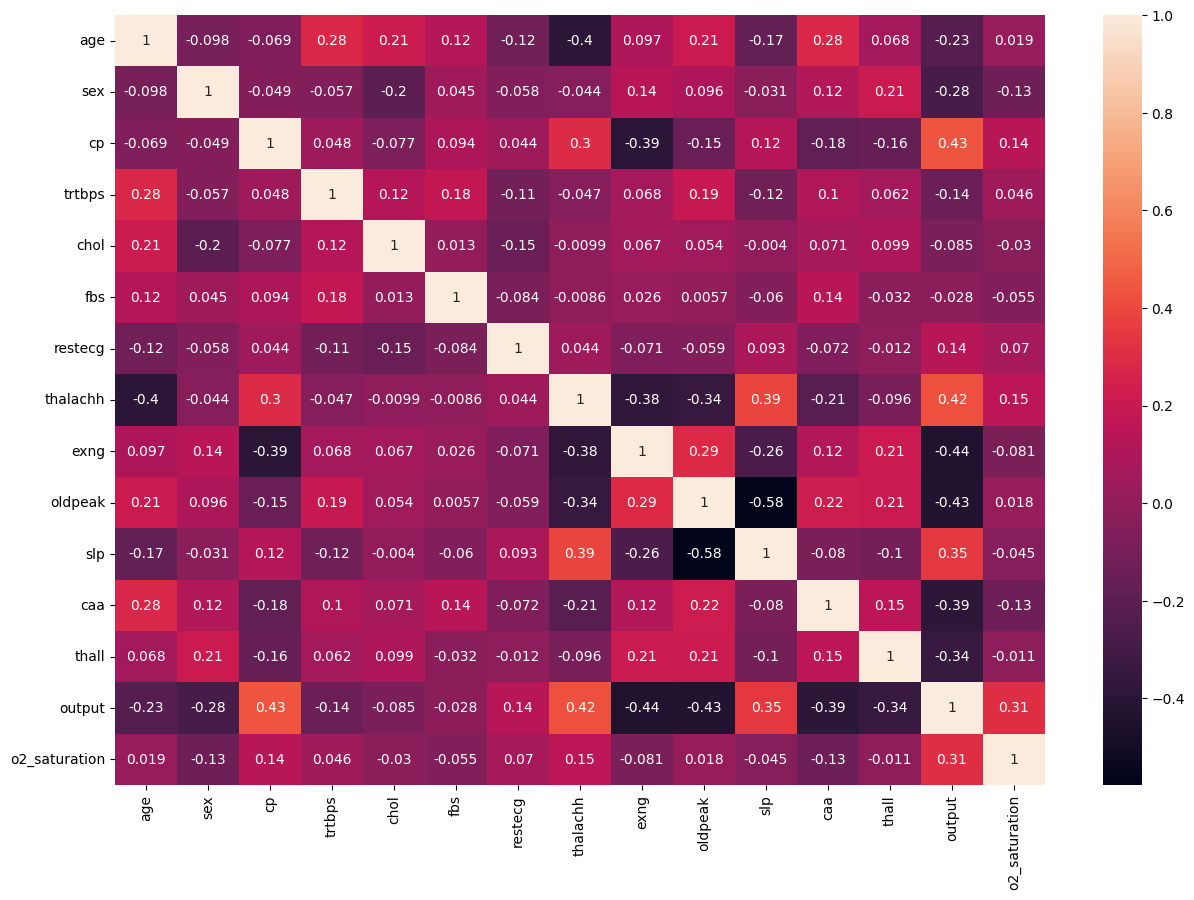

In [13]:
corr = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

## Random Forest Classifier

In [14]:
# Specify X and y and split the dataset
X = data.drop("output",axis = 1)
y = data.output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state  = 14)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 14), (91, 14), (212,), (91,))

In [16]:
(212)/(212+91)

0.6996699669966997

In [17]:
# specify model
forest = RandomForestClassifier(random_state  = 14)

# train model
forest.fit(X_train, y_train)

# make prediction
forest_preds = forest.predict(X_test)

In [18]:
forest_preds

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

## Evaluate the result

In [29]:
# Manually calculate number of True positive and False negative predictions
df_res = pd.DataFrame()
df_res["true"] = y_test
df_res["predict"] = forest_preds
len(df_res[(df_res["true"]==1)&(df_res["predict"]==1)])


41

In [30]:
len(df_res[(df_res["true"]==0)&(df_res["predict"]==0)])

33

Text(0.5, 1.0, 'Confusion Matrix')

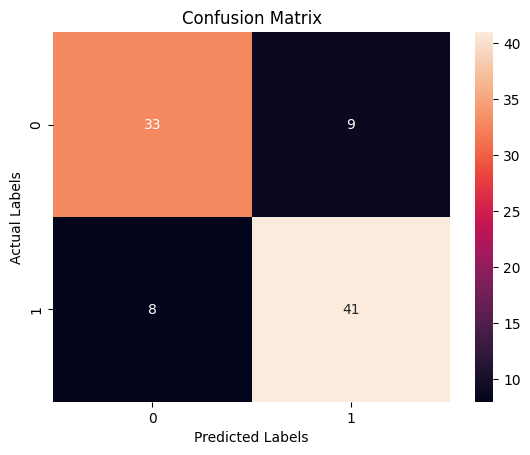

In [20]:
sns.heatmap(confusion_matrix(y_test, forest_preds), annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")

In [31]:
# Based on the confusion matrics fill:
true_positive  = 41
true_negative  = 33
false_positive = 9
false_negative = 8

In [32]:
# Precision:  measure of how many of the positive predictions made are correct (true positives)
print(round(true_positive/ (true_positive + false_positive),2))
print(round(sklearn.metrics.precision_score(y_test, forest_preds), 2))

0.82
0.82


In [33]:
# Recall:     is a measure of how many of the positive cases the classifier correctly predicted
print(round(true_positive/(false_negative+true_positive),2))
print(round(sklearn.metrics.recall_score(y_test, forest_preds), 2))

0.84
0.84


In [35]:
recall = true_positive/(false_negative+true_positive)
precision = true_positive/ (true_positive + false_positive)

In [36]:
# F1-Score:   is a measure combining both precision and recall 2(prec*recall)/(prec+recall)
print(round(2*(recall*precision),2))
print(round(sklearn.metrics.f1_score(y_test, forest_preds), 2))

1.37
0.83


In [37]:
# Accuracy: describing the number of correct predictions over all predictions
print(round((true_positive+true_negative)/(true_negative+true_positive+false_negative+false_positive),2))
print(round(sklearn.metrics.accuracy_score(y_test, forest_preds), 2))

0.81
0.81


## Save the result

In [39]:
# create empty df with indexes: ['precision','recall', 'f1_score','accuracy']
dfr = pd.DataFrame(index = ['precision','recall', 'f1_score','accuracy'])

""
precision
recall
f1_score
accuracy


In [40]:
# write a function which will return 4 metrics:
# [round(sklearn.metrics.precision_score(y_test, forest_preds), 2),round(sklearn.metrics.recall_score(y_test, forest_preds), 2),round(sklearn.metrics.f1_score(y_test, forest_preds), 2),round(sklearn.metrics.accuracy_score(y_test, forest_preds), 2)]

def get_eval(y_true, y_pred):
    return [round(sklearn.metrics.precision_score(y_true, y_pred), 2),round(sklearn.metrics.recall_score(y_true, y_pred), 2),round(sklearn.metrics.f1_score(y_true, y_pred), 2),round(sklearn.metrics.accuracy_score(y_true, y_pred), 2)]


In [41]:
# add the result of model_1 into the df 'result'

dfr["model_1"] = get_eval(y_test, forest_preds)
dfr

,model_1
precision,0.82
recall,0.84
f1_score,0.83
accuracy,0.81


### Change the threshold

In [42]:
forest.predict(X_test)[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [43]:
forest.predict_proba(X_test)[:5]

array([[0.82, 0.18],
       [0.37, 0.63],
       [0.81, 0.19],
       [0.79, 0.21],
       [0.33, 0.67]])

In [44]:
pred_prob = forest.predict_proba(X_test)
pred_prob

array([[0.82, 0.18],
       [0.37, 0.63],
       [0.81, 0.19],
       [0.79, 0.21],
       [0.33, 0.67],
       [0.25, 0.75],
       [0.49, 0.51],
       [0.16, 0.84],
       [0.69, 0.31],
       [0.34, 0.66],
       [0.17, 0.83],
       [0.14, 0.86],
       [0.85, 0.15],
       [0.56, 0.44],
       [0.97, 0.03],
       [0.44, 0.56],
       [0.09, 0.91],
       [0.9 , 0.1 ],
       [0.17, 0.83],
       [0.49, 0.51],
       [0.19, 0.81],
       [0.07, 0.93],
       [0.4 , 0.6 ],
       [0.57, 0.43],
       [0.3 , 0.7 ],
       [0.42, 0.58],
       [0.48, 0.52],
       [0.6 , 0.4 ],
       [0.51, 0.49],
       [0.61, 0.39],
       [0.87, 0.13],
       [0.02, 0.98],
       [0.88, 0.12],
       [0.11, 0.89],
       [0.07, 0.93],
       [0.61, 0.39],
       [0.65, 0.35],
       [0.42, 0.58],
       [1.  , 0.  ],
       [0.72, 0.28],
       [0.06, 0.94],
       [0.96, 0.04],
       [0.53, 0.47],
       [0.54, 0.46],
       [0.14, 0.86],
       [0.67, 0.33],
       [0.41, 0.59],
       [0.33,

In [48]:
#50%
[0 if i >= 0.5 else 1 for i ,k in pred_prob][:5]

[0, 1, 0, 0, 1]

In [49]:
# get the result for a threshold = 0.7
[0 if i >= 0.7 else 1 for i ,k in pred_prob][:5]

[0, 1, 0, 0, 1]

In [55]:
for th in [i/10 for i in range(1,10)]:
    pred_th = [0 if i >= th else 1 for i ,k in pred_prob]
    dfr[f"model_tr_{th}"] = get_eval(y_test, pred_th)

In [61]:
dfr.T#.sort_values("f1_score")

,precision,recall,f1_score,accuracy
model_1,0.82,0.84,0.83,0.81
model_tr_0.1,1.00,0.18,0.31,0.56
model_tr_0.2,0.96,0.47,0.63,0.70
model_tr_0.3,0.90,0.55,0.68,0.73
model_tr_0.4,0.85,0.69,0.76,0.77
model_tr_0.5,0.82,0.84,0.83,0.81
model_tr_0.6,0.78,0.92,0.84,0.81
model_tr_0.7,0.75,1.00,0.86,0.82
model_tr_0.8,0.69,1.00,0.82,0.76
model_tr_0.9,0.61,1.00,0.76,0.66


In [44]:
# get the result for any threshold from 0.1 till 0.9 and add it into 'result' df


In [45]:
# print the result sorted by accuracy




### Using RandomizedSearchCV for hyperparameter turning

In [62]:
estimator = RandomForestClassifier()
grid = {"n_estimators": [80, 90, 100, 110, 120],
        "max_depth": [5, 10, 15],
        "max_features" : ["auto", "sqrt", "log2"],
        "min_samples_split": [2, 1, 3, 4],
        "min_samples_leaf": [1, 2, 3, 4]}

rand_search_model = RandomizedSearchCV(estimator=estimator,
                                      param_distributions=grid)

In [65]:
# Retrain the model with tuned parameters and compare with model 1
rand_search_model.fit(X_train,y_train)
pred_rand_search = rand_search_model.predict(X_test)

c:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTre

In [66]:
rand_search_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 15}

In [68]:
dfr["model_tuned"] = get_eval(y_test, pred_rand_search)
dfr.T.sort_values("accuracy")


,precision,recall,f1_score,accuracy
model_tr_0.1,1.00,0.18,0.31,0.56
model_tr_0.9,0.61,1.00,0.76,0.66
model_tr_0.2,0.96,0.47,0.63,0.70
model_tr_0.3,0.90,0.55,0.68,0.73
model_tr_0.8,0.69,1.00,0.82,0.76
model_tr_0.4,0.85,0.69,0.76,0.77
model_tuned,0.82,0.82,0.82,0.80
model_1,0.82,0.84,0.83,0.81
model_tr_0.5,0.82,0.84,0.83,0.81
model_tr_0.6,0.78,0.92,0.84,0.81


## Feature importance

In [69]:
importances = forest.feature_importances_

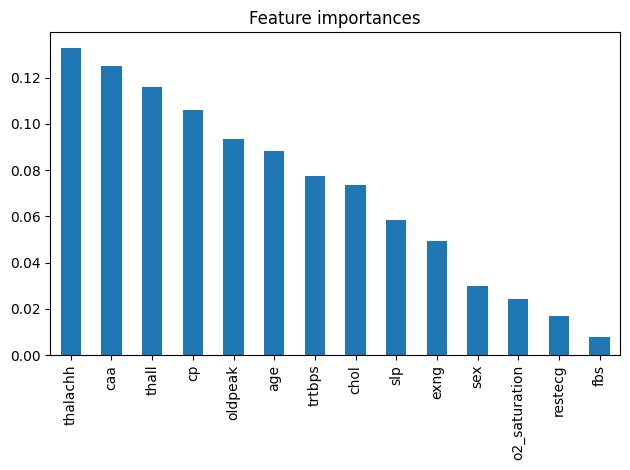

In [70]:
forest_importances = pd.Series(importances, index = X.columns)
forest_importances = forest_importances.sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

In [35]:
# Drop the least important feature and compare the result with model 1

In [71]:
X = data.drop(["output","fbs"],axis = 1)
y = data.output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state  = 14)


In [ ]:
# specify model
forest = RandomForestClassifier(random_state  = 14)

# train model
forest.fit(X_train, y_train)

# make prediction
forest_preds = forest.predict(X_test)